In [16]:
result_dir = "results/results_test/exp_test15"

In [7]:
# 从 log.txt 中提取实验结果
'''
    从 log.txt 中提取实验结果
    分别是第三波和第四波的 (21,7) (21,14) (21,21) 共六次的实验结果
    每次都分
        test mae,
        test rmse,
        early_stop_epoch,
        result dir timestamp
    四次
'''
import os, re

exp = 0
files = os.listdir(result_dir)
assert not len(files) % 6
files = [sorted(files[i: i + 6], key=lambda i: int(i.split('_')[0]) * 100 + int(i.split('_')[2])) for i in range(len(files) // 6)]
# sorted()
files = files[exp]
res = ()
for exp in files:
    path = os.path.join(result_dir, exp, "log.txt")
    with open(path) as f: lines = f.readlines()
    for i in range(len(lines)):
        if "训练完毕，开始评估" in lines[i]:
            break
    try:
        test_metrices = re.search(r"\[test.*\]\ (.*)", lines[i + 1]).groups()
        test_metrices = test_metrices[0].split('/')
        epoch, test_loss = re.search(r"\[Epoch\]\ (\d+).*\[Loss.*?/([\d.]+)", lines[i - 2]).groups()
        res += (*test_metrices, epoch, exp.split('_')[-1])
    except Exception as e:
        res += (('-',) * 4)
print('\t'.join(res))
    


-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-


In [17]:
import subprocess, os
print(os.getcwd())
path = os.path.join(os.getcwd(), "results/results_test/exp_test15")
subprocess.run(f'python utils/record_result.py -d {path}'.split(' '))

/home/hbj/workspace/vscode_workspace/lp/workspace/custom
'NoneType' object has no attribute 'groups'
latest
19.613	24.849	999	20240715203451	18.039	23.899	999	20240715203452	17.440	23.902	999	20240715203452	12.662	15.259	999	20240715203452	11.586	14.215	999	20240715203453	-	-	-	-
best
19.631	24.867	992	20240715203451	18.017	23.880	996	20240715203452	17.440	23.902	999	20240715203452	12.540	15.148	998	20240715203452	11.639	14.254	998	20240715203453	19.827	26.238	12	20240715203454


CompletedProcess(args=['python', 'utils/record_result.py', '-d', '/home/hbj/workspace/vscode_workspace/lp/workspace/custom/results/results_test/exp_test15'], returncode=0)

In [ ]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file('../data/multiwave_data/tokyo_shapefile/tokyo.shp')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis(False)
gdf.plot(ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
from main import read_data, swap_key
from argparse import Namespace
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

# 读取数据
data = read_data(Namespace(data_dir='../data/multiwave_data'))
zone_data = data[1]
zone_data = swap_key(zone_data)

# 将字典转换为DataFrame
time_series = pd.DataFrame(zone_data).T
time_series.index.name = 'JCODE'

# 读取shapefile
gdf = gpd.read_file('../data/multiwave_data/tokyo_shapefile/tokyo.shp')
gdf = gdf.set_index('JCODE').join(time_series)

# 获取所有的时间点
time_points = time_series.columns

# 设置绘图
def plot_map(date):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title(f"Date: {date}")
    gdf.plot(column=date, ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
    plt.show()

# 创建交互式控件
interact_manual(plot_map, date=time_points)


In [2]:
def check(
    csv_dir="results_test/exp_test/4_21_7_20240705222323",
    epoch_end=None, incomplete=True
):
    import os, pandas as pd
    import matplotlib.pyplot as plt
    from utils.custom_datetime import date2str, str2date

    check_keys = ['mae_test', 'rmse_test', 'mae_val', 'rmse_val']
    # print("{} 结果可视化".format(', '.join(check_keys)))
    # latest_dir = sorted(os.listdir('results'))[idx]
    # res = pd.read_csv(f'results/{latest_dir}/results_jp.csv')
    csv_path = os.path.join(csv_dir, "results_jp.csv")
    latest_dir = csv_path.split('/')[-2].split('_')[-1]
    res = pd.read_csv(csv_path)
    index = list(res["loss_test"][:epoch_end]).index(min(res["loss_test"][:epoch_end]))
    print(f'[Min {list(res["Epoch"])[index]}]', ' '.join([f'[{key}] {list(res[key])[index]}' for key in check_keys]))
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    fig.suptitle(f"({index}) " + date2str(str2date(latest_dir, '%Y%m%d%H%M%S'), '%Y-%m-%d %H:%M:%S'))
    if epoch_end is None: epoch_end = len(res['Epoch'])
    assert epoch_end <= len(res['Epoch'])
    for key in check_keys[:2]: ax[0].plot(res['Epoch'][:epoch_end], res[key][:epoch_end])
    ax[0].legend(check_keys[:2]); ax[0].set_title('test')
    for key in check_keys[2:]: ax[1].plot(res['Epoch'][:epoch_end], res[key][:epoch_end])
    ax[1].legend(check_keys[2:]); ax[1].set_title('validate')
    plt.show()
    print('|'.join(list(res.keys())))

[Min 495] [mae_test] 9.932 [rmse_test] 13.592 [mae_val] 2.388 [rmse_val] 3.25


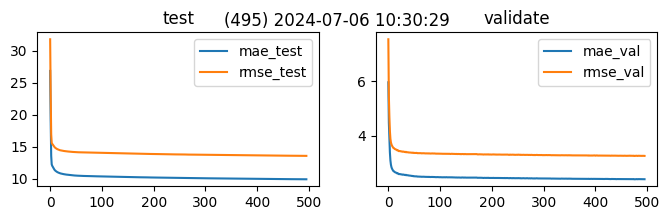

Epoch|loss_train|loss_val|loss_test|mae_val|rmse_val|mae_test|rmse_test|lr|time


In [3]:
path = 'results/test/exp_test2/3_21_14_20240706103029'
check(path)

In [ ]:
# 查看 adjust_lambda
from argparse import Namespace, ArgumentParser
import numpy as np, math
import matplotlib.pyplot as plt
choices = ['linear', 'square', 'step', 'exp']
parser = ArgumentParser()
parser.add_argument('--epochs', type=int, default=1000, help='Number of epochs to train.')
parser.add_argument('--graph-learner-decay', choices=choices, default='square', help='设置使用图学习器评估loss的衰减')
parser.add_argument('--graph-learner-decay-k', default=1e-2, help='lambda_T = k * lambda_0')
parser.add_argument('--graph-learner-decay-start-epoch', default=50, help='衰减开始epoch')
parser.add_argument('--graph-learner-decay-start-lambda', default=1., help='衰减开始值')
parser.add_argument('--f', help='')
args = parser.parse_args()

def adjust_lambda(args, epoch, consider_start_epoch=True):
    epoch_start = args.graph_learner_decay_start_epoch
    k = args.graph_learner_decay_k  # 衰减速率

    lambda_0 = args.graph_learner_decay_start_lambda
    y0 = lambda_0 #  f(epoch_start)

    if consider_start_epoch:
        if epoch <= epoch_start: return lambda_0
        else:
            y0 = adjust_lambda(args, epoch_start, False)

    if args.graph_learner_decay == 'linear':
        res = 1 + (k - 1) / args.epochs * epoch
    elif args.graph_learner_decay == 'step':
        res = 1 - k * 10 * (epoch // (args.epochs * k * 10))
    elif args.graph_learner_decay == 'square':
        res = 1 + (k - 1) * (epoch / args.epochs) ** 2
    elif args.graph_learner_decay == 'exp':
        res = 2 - np.exp(np.log(2 - k) * (epoch / args.epochs))
    return lambda_0 * res * (1 - k) / (y0 - k)

x = range(1000)
ys = None
for i in range(len(choices)):
    args.graph_learner_decay = choices[i]
    if ys is None:
        ys = [[adjust_lambda(args, i) for i in x]]
    else:
        ys += [[adjust_lambda(args, i) for i in x]]
[plt.plot(x, y) for y in ys]
plt.legend(['linear', 'step', 'square', 'exp'])
plt.show()

In [ ]:
adjust_lambda(args, 100)